In [1]:
!pip install -q fastai fastbook nbdev transformers

In [2]:
import os
import numpy as np
import pandas as pd
from fastai import *
from PIL import Image
from fastbook import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree

In [3]:
%cd /kaggle/input/artwork-title-generator

/kaggle/input/artwork-title-generator


In [4]:
img_folders = os.listdir()
img_folders

['UnitedStates', 'Netherlands', 'China']

In [5]:
input_path = "/kaggle/input/artwork-title-generator"
output_path = "/kaggle/working/images/"

for folder in img_folders:
    copy_tree(input_path+'/'+folder, output_path+folder)

In [6]:
%cd /kaggle/working/images/

/kaggle/working/images


In [7]:
img_folders = os.listdir()
img_folders

['Netherlands', 'China', 'UnitedStates']

In [8]:
def plot_images_distribution(dic):
  labels = dic.keys()
  number_of_images = dic.values()
  plt.bar(labels, number_of_images)
  plt.xlabel('Labels')
  plt.xticks(rotation=90)
  plt.ylabel('Number of images')
  plt.title('Images distribiution')
  plt.show()

In [9]:
def img_numbers() -> dict: return { folder_name: len(get_image_files_sorted(folder_name)) for folder_name in img_folders}

{'Netherlands': 2034, 'China': 3573, 'UnitedStates': 2998}


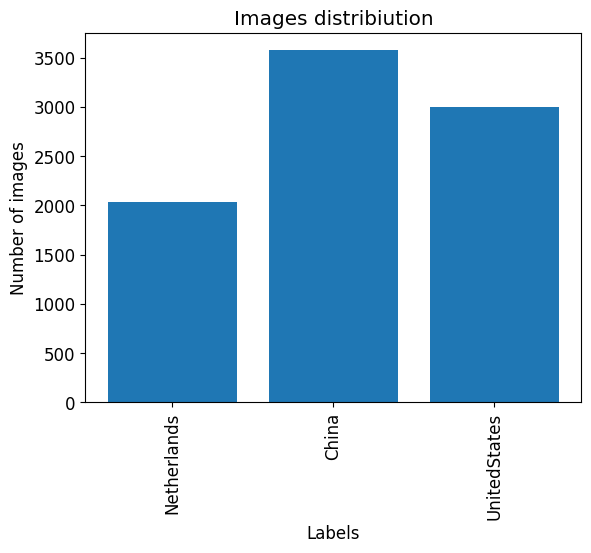

In [10]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)

In [11]:
def image_verification(folders):
  for folder in folders:
    failed = verify_images(get_image_files_sorted(folder))
    for img in failed:
      os.remove(img)

In [12]:
image_verification(folders = img_folders)

{'Netherlands': 2011, 'China': 3494, 'UnitedStates': 2970}


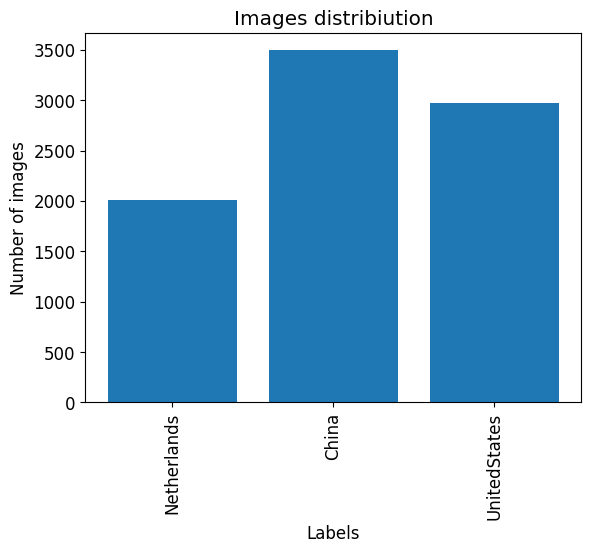

In [13]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)

In [14]:
gray_scale_images = [image_path for folder in img_folders for image_path in get_image_files_sorted(folder) if np.array(Image.open(image_path)).ndim not in [3,4]]

In [15]:
for path in gray_scale_images: 
    os.remove(path)

{'Netherlands': 2008, 'China': 3488, 'UnitedStates': 2964}


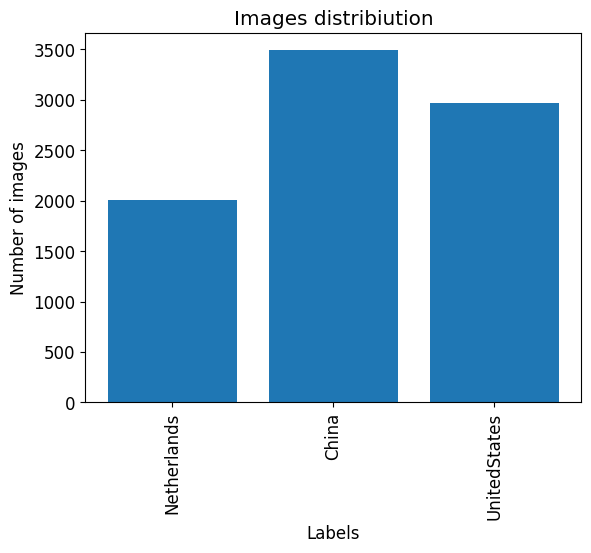

In [16]:
img_dict = img_numbers()
print(img_dict)
plot_images_distribution(img_dict)